In [4]:
from student_client import create_student_gym_env

env = create_student_gym_env(user_token='baseline1')
step_size = 10 # fixed default step_size, do not change it

2026-02-11 14:13:33,704 - student_client.student_gym_env - WARNING - No .env file found and no explicit parameters provided. Using default values. For better setup, create a .env file with:
SERVER_URL=http://rlchallenge.orailix.com
USER_TOKEN=student_user
ENV_TYPE=DegradationEnv
MAX_STEPS_PER_EPISODE=1000
AUTO_RESET=True
TIMEOUT=30.0
2026-02-11 14:13:33,835 - student_client.student_gym_env - INFO - Created new session: f7a0361d-ac50-4054-b73b-6979f5f6fee8
2026-02-11 14:13:34,812 - student_client.student_gym_env - INFO - Created new episode: c490e1f5-8201-44b1-8a4c-c2c0df6939d2
2026-02-11 14:13:34,812 - student_client.student_gym_env - INFO - StudentGymEnv initialized with episode c490e1f5-8201-44b1-8a4c-c2c0df6939d2


In [5]:
# Reset environment to get initial observation
obs, info = env.reset()
print(f"📋 Starting episode {info.get('episode_id', 'unknown')}")

obs.shape, info

2026-02-11 14:13:35,909 - student_client.student_gym_env - INFO - Episode c490e1f5-8201-44b1-8a4c-c2c0df6939d2 reset successfully


📋 Starting episode c490e1f5-8201-44b1-8a4c-c2c0df6939d2


((9,),
 {'step': 0,
  'episode_id': 'c490e1f5-8201-44b1-8a4c-c2c0df6939d2',
  'terminated': False,
  'truncated': False})

In [6]:

# Initialize data collection arrays
observations = []
actions = []
rewards = []
total_timesteps = 0


for step in range(50):

    # Choose a random action (0=do nothing, 1=repair, 2=sell)
    action = env.action_space.sample()

    # Take step in environment
    #obs, reward, terminated, truncated, info = env.step(action, step_size=10, return_all_states=True)

    obs_result, reward, terminated, truncated, info = env.step(
        action=action, step_size=step_size, return_all_states=True
    )

    # Handle the observation result
    if isinstance(obs_result, list):
        # Multiple observations returned
        observations.extend(obs_result)
        # Action is applied at the first timestep of this interval
        actions.append(action)
        if action != 2:
            actions.extend([0] * (len(obs_result)-1)) # fill with no actions
    else:
        actions.append(action)

    rewards.append(reward)

    # Update total timesteps - server advances by step_size but returns only final observation
    total_timesteps += step_size

    # Print progress every step
    if step % 1 == 0:
        print(f" Step {total_timesteps}: Reward={reward:.2f}, Total={sum(rewards):.2f}")

    # Check if episode ended
    if terminated or truncated:
        print(f"🏁 Episode ended at step {total_timesteps} with reward={reward:.2f}")
        break


# Print summary statistics
total_reward = sum(rewards)
print(f"\n Episode Summary:")
print(f"   Total Steps: {len(actions)}")
print(f"   Total Reward: {total_reward:.2f}")
print(f"   Actions Taken: {len([a for a in actions if a == 1])} repairs, {len([a for a in actions if a == 2])} sell")

# Finish episode
env.close()

 Step 10: Reward=446.85, Total=446.85
 Step 20: Reward=403.47, Total=850.32


2026-02-11 14:13:40,932 - student_client.student_gym_env - INFO - Closed environment c490e1f5-8201-44b1-8a4c-c2c0df6939d2


 Step 30: Reward=-506.20, Total=344.12
Episode c490e1f5-8201-44b1-8a4c-c2c0df6939d2 reached termination state, reason: sold
 Step 40: Reward=131.44, Total=475.56
🏁 Episode ended at step 40 with reward=131.44

 Episode Summary:
   Total Steps: 31
   Total Reward: 475.56
   Actions Taken: 1 repairs, 1 sell


In [7]:
len(observations), len(actions)

(31, 31)

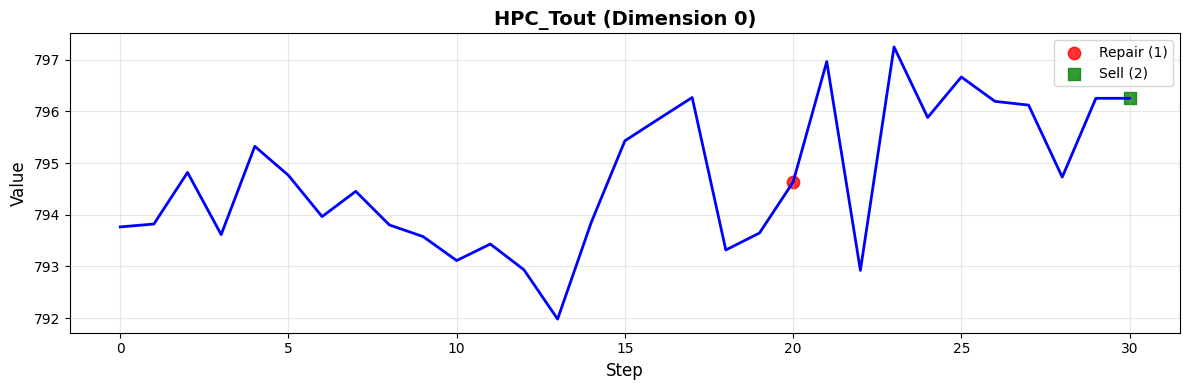

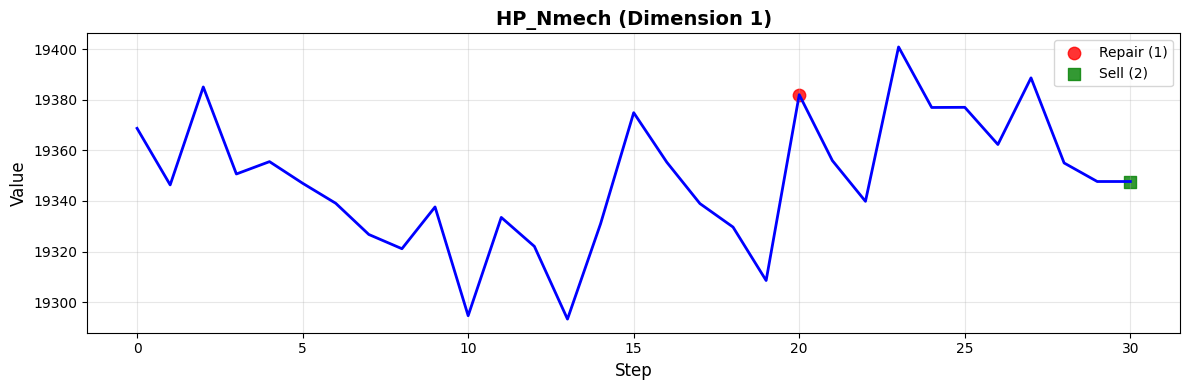

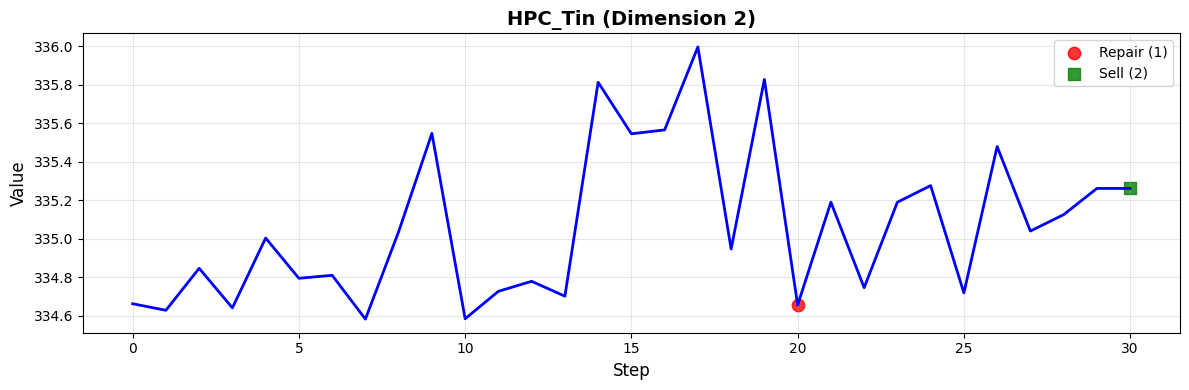

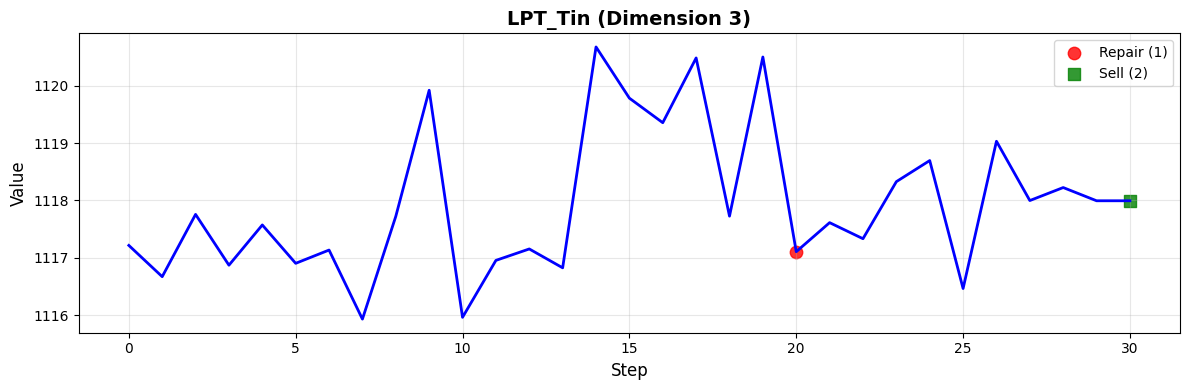

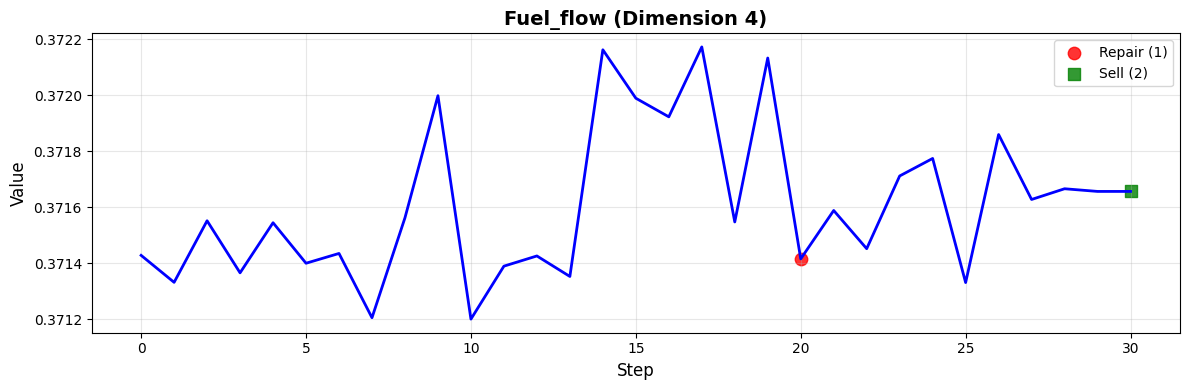

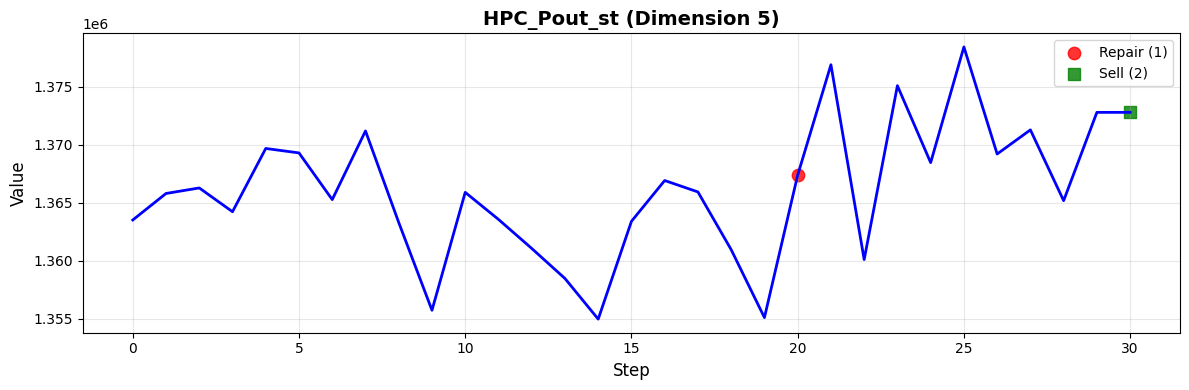

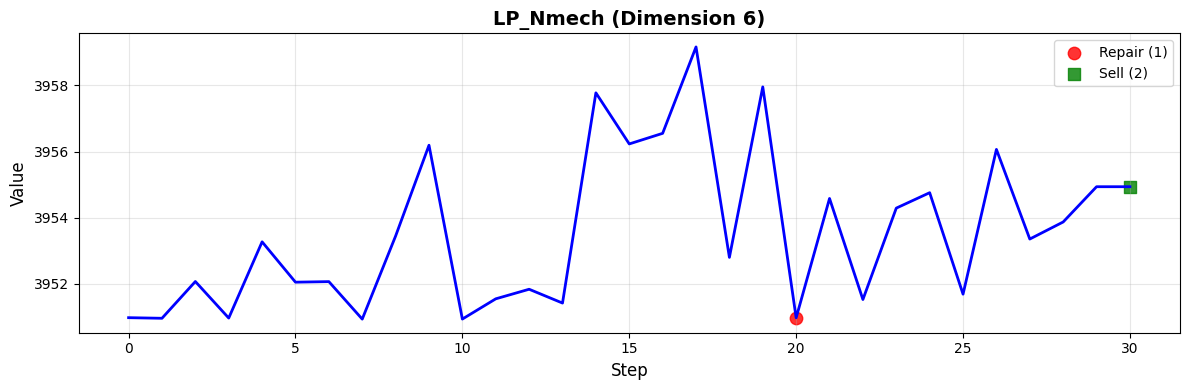

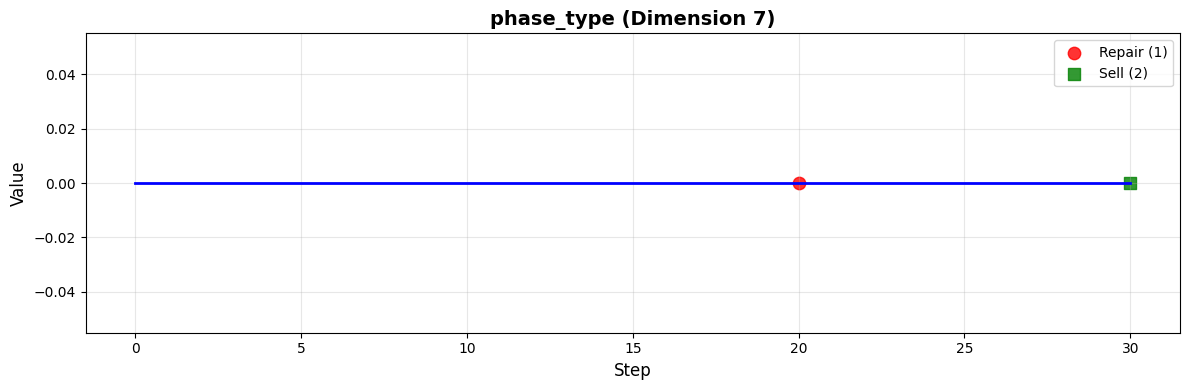

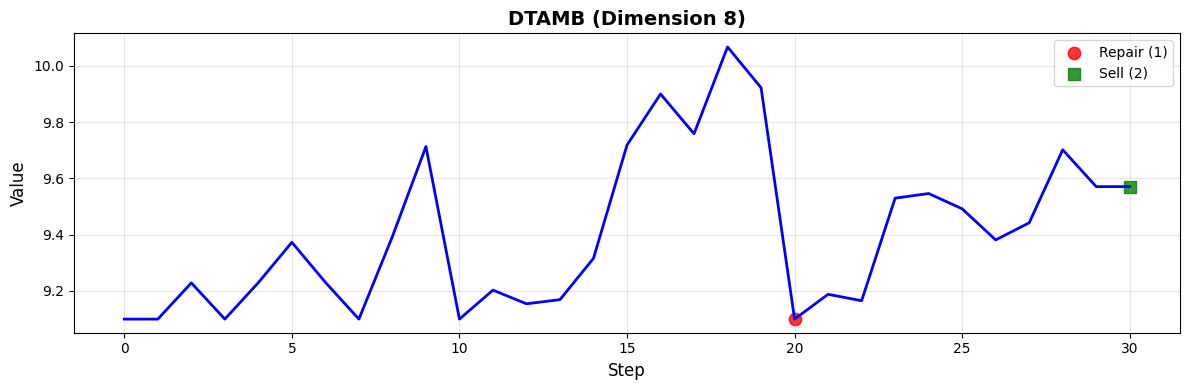

In [8]:
from student_client.plotting import plot_observations

plot_observations(
        observations=observations,
        actions=actions,
        title="Simple Policy - Observation Dimensions Over Time"
    )

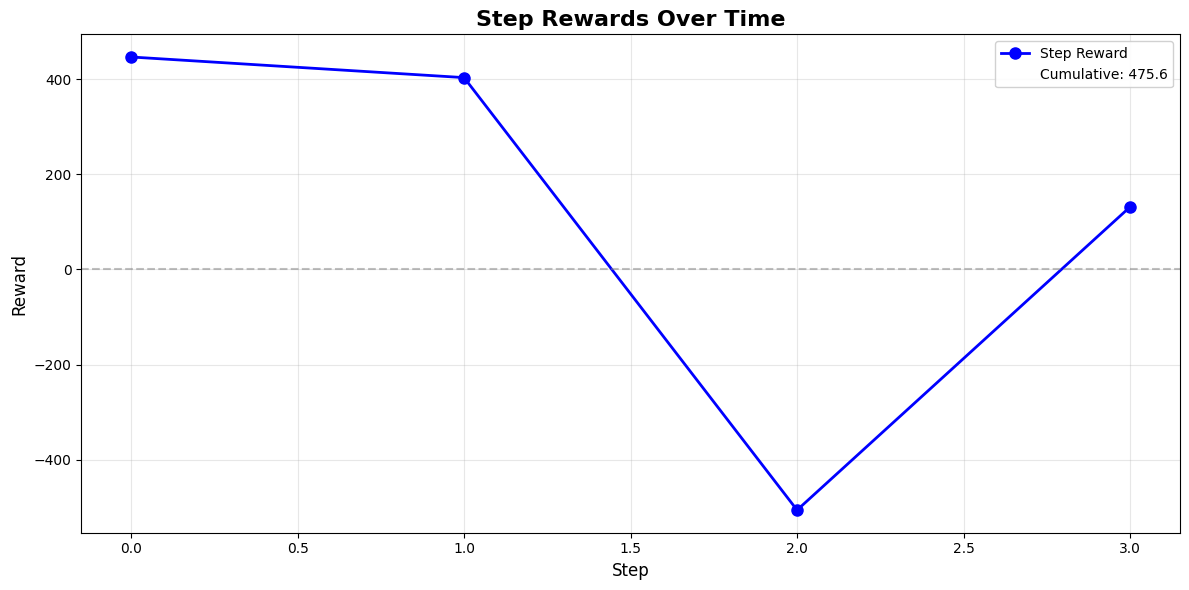

📊 Reward Statistics:
   Total Steps: 4
   Total Reward: 475.56
   Average Reward: 118.89
   Max Reward: 446.85
   Min Reward: -506.20


In [9]:
from student_client.plotting import plot_rewards

plot_rewards(rewards=rewards)